In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [217]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    ! ls
except: ModuleNotFoundError

In [218]:
file_name = 'df_final.csv'
drive_path = '/content/drive/My Drive/1-Master/Projekte und Ideen/fussball/scraper/df_final.csv'

try:
    df_org = pd.read_csv(drive_path, sep=',', index_col=0)
except:
    df_org = pd.read_csv(file_name, sep=',', index_col=0)

In [219]:
df = df_org.copy()

In [220]:
df.weekday = df.weekday.astype(str)
df.day = df.day.astype(str)
df.month = df.month.astype(str)
df.year = df.year.astype(str)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5158 entries, 0 to 5157
Data columns (total 68 columns):
weekday                         5158 non-null object
day                             5158 non-null object
month                           5158 non-null object
year                            5158 non-null object
home_team_break                 5158 non-null object
guest_team_break                5158 non-null object
date                            5158 non-null object
time                            5158 non-null object
home_team_name                  5158 non-null object
guest_team_name                 5158 non-null object
competition                     5158 non-null object
saison                          5158 non-null object
gameday                         5158 non-null object
home_coach                      5158 non-null object
guest_coach                     5158 non-null object
resultNumeric                   5152 non-null float64
homeTotalGoalsShoot             5158 non-nul

In [222]:
df.columns

Index(['weekday', 'day', 'month', 'year', 'home_team_break',
       'guest_team_break', 'date', 'time', 'home_team_name', 'guest_team_name',
       'competition', 'saison', 'gameday', 'home_coach', 'guest_coach',
       'resultNumeric', 'homeTotalGoalsShoot', 'homeTotalGoalsReceived',
       'homeTotalGoalDiff', 'guestTotalGoalsShoot', 'guestTotalGoalsReceived',
       'guestTotalGoalDiff', 'homeTeamGoalsShootAtHome',
       'homeTeamGoalsReceivedAtHome', 'homeTeamGoalsDiffAtHome',
       'homeTeamGoalsShootAway', 'homeTeamGoalsReceivedAway',
       'homeTeamGoalsDiffAway', 'guestTeamGoalsShootAtHome',
       'guestTeamGoalsReceivedAtHome', 'guestTeamGoalsDiffAtHome',
       'guestTeamGoalsShootAway', 'guestTeamGoalsReceivedAway',
       'guestTeamGoalsDiffAway', 'hoamAvgPoints', 'guestAvgpoints', 'htb_0',
       'htb_2', 'htb_3', 'htb_4', 'htb_5', 'htb_6', 'htb_7', 'htb_8', 'htb_9',
       'htb_10', 'htb_11', 'htb_12', 'htb_13', 'htb_14', 'htb_15', 'htb_>15',
       'gtb_0', 'gtb_2', 

In [223]:
ndf = df.shape[0]
df.shape

(5158, 68)

In [224]:
ndf

5158

In [225]:
df = df.drop(['date'], axis=1)

In [226]:
from keras.utils import to_categorical

In [227]:
categorial_variables

Index(['weekday', 'day', 'month', 'year', 'home_team_break',
       'guest_team_break', 'time', 'home_team_name', 'guest_team_name',
       'competition', 'saison', 'gameday', 'home_coach', 'guest_coach'],
      dtype='object')

In [228]:
categorial_variables = df.columns[:14]
# categorial_variables = categorial_variables.drop(['viewers', 'home_game_system', 'guest_game_system'], axis=1)
categorial_variables

Index(['weekday', 'day', 'month', 'year', 'home_team_break',
       'guest_team_break', 'time', 'home_team_name', 'guest_team_name',
       'competition', 'saison', 'gameday', 'home_coach', 'guest_coach'],
      dtype='object')

In [229]:
df_cat = pd.get_dummies(df[categorial_variables])
df = pd.concat([df, df_cat], axis=1)
df = df.drop(categorial_variables, axis=1)
# df = df.drop(['home_team_break', 'guest_team_break'], axis=1)

In [230]:
df.shape

(5158, 1173)

In [231]:
df.head()

,resultNumeric,homeTotalGoalsShoot,homeTotalGoalsReceived,homeTotalGoalDiff,guestTotalGoalsShoot,guestTotalGoalsReceived,guestTotalGoalDiff,homeTeamGoalsShootAtHome,homeTeamGoalsReceivedAtHome,homeTeamGoalsDiffAtHome,...,guest_coach_Walter Kogler,guest_coach_Walter Schachner,guest_coach_Werner Grabherr,guest_coach_Werner Gregoritsch,guest_coach_Werner Ofner,guest_coach_Wilhelm Schuldes,guest_coach_Wilhelm Wahlmüller,guest_coach_Wolfgang Luisser,guest_coach_Zoran Barisic,guest_coach_Óscar García
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5158 entries, 0 to 5157
Columns: 1173 entries, resultNumeric to guest_coach_Óscar García
dtypes: float64(21), int64(32), uint8(1120)
memory usage: 7.6 MB


In [233]:
df.columns

Index(['resultNumeric', 'homeTotalGoalsShoot', 'homeTotalGoalsReceived',
       'homeTotalGoalDiff', 'guestTotalGoalsShoot', 'guestTotalGoalsReceived',
       'guestTotalGoalDiff', 'homeTeamGoalsShootAtHome',
       'homeTeamGoalsReceivedAtHome', 'homeTeamGoalsDiffAtHome',
       ...
       'guest_coach_Walter Kogler', 'guest_coach_Walter Schachner',
       'guest_coach_Werner Grabherr', 'guest_coach_Werner Gregoritsch',
       'guest_coach_Werner Ofner', 'guest_coach_Wilhelm Schuldes',
       'guest_coach_Wilhelm Wahlmüller', 'guest_coach_Wolfgang Luisser',
       'guest_coach_Zoran Barisic', 'guest_coach_Óscar García'],
      dtype='object', length=1173)

In [234]:
df.resultNumeric

0       0.0
1       1.0
2       4.0
3       2.0
4       1.0
5      -1.0
6       0.0
7       5.0
8       1.0
9      -4.0
10      0.0
11      0.0
12     -2.0
13      3.0
14      2.0
15     -2.0
16      4.0
17     -1.0
18      1.0
19     -1.0
20     -3.0
21      0.0
22      0.0
23      0.0
24      5.0
25      0.0
26      2.0
27     -1.0
28      2.0
29      1.0
       ... 
5128   -2.0
5129    2.0
5130    0.0
5131    0.0
5132    2.0
5133    2.0
5134    3.0
5135   -1.0
5136    1.0
5137    0.0
5138    3.0
5139    0.0
5140    1.0
5141   -4.0
5142    2.0
5143   -3.0
5144    2.0
5145   -1.0
5146    1.0
5147    1.0
5148    1.0
5149   -2.0
5150   -1.0
5151    1.0
5152    NaN
5153    NaN
5154    NaN
5155    NaN
5156    NaN
5157    NaN
Name: resultNumeric, Length: 5158, dtype: float64

In [235]:
df_pred = df[pd.isnull(df).any(axis=1)]
df = df.dropna()
y = df.resultNumeric
df = df.drop(['resultNumeric'], axis=1)
df_pred = df_pred.drop('resultNumeric', axis=1)

In [202]:
df_pred.head()

,resultNumeric,homeTotalGoalsShoot,homeTotalGoalsReceived,homeTotalGoalDiff,guestTotalGoalsShoot,guestTotalGoalsReceived,guestTotalGoalDiff,homeTeamGoalsShootAtHome,homeTeamGoalsReceivedAtHome,homeTeamGoalsDiffAtHome,...,guest_coach_Walter Kogler,guest_coach_Walter Schachner,guest_coach_Werner Grabherr,guest_coach_Werner Gregoritsch,guest_coach_Werner Ofner,guest_coach_Wilhelm Schuldes,guest_coach_Wilhelm Wahlmüller,guest_coach_Wolfgang Luisser,guest_coach_Zoran Barisic,guest_coach_Óscar García
5152,NaN,1.797531,0.459259,1.338272,2.000000,1.500000,0.500000,1.926702,0.973822,0.952880,...,0,0,0,0,0,0,0,0,0,0
5153,NaN,1.334507,0.602113,0.732394,1.328321,1.541353,-0.213033,1.372263,1.248175,0.124088,...,0,0,0,0,0,0,0,0,0,0
5154,NaN,1.346330,0.665138,0.681193,2.249541,0.902752,1.346789,1.386473,1.400966,-0.014493,...,0,0,0,0,0,0,0,0,0,0
5155,NaN,1.612500,0.500000,1.112500,1.330247,1.722222,-0.391975,1.784211,1.052632,0.731579,...,0,0,0,0,0,0,0,0,0,0
5156,NaN,1.543046,0.556291,0.986755,1.778226,1.169355,0.608871,1.625000,1.166667,0.458333,...,0,0,0,0,0,0,0,0,0,0


In [367]:
X = df.copy()

In [368]:
# X = X.drop(['homeTotalGoalsShoot', 'homeTotalGoalsReceived',
#        'guestTotalGoalsShoot', 'guestTotalGoalsReceived',
#        'homeTeamGoalsShootAtHome', 'homeTeamGoalsReceivedAtHome',
#        'homeTeamGoalsShootAway',
#        'homeTeamGoalsReceivedAway',
#        'guestTeamGoalsShootAtHome', 'guestTeamGoalsReceivedAtHome',
#        'guestTeamGoalsShootAway',
#        'guestTeamGoalsReceivedAway', 'hoamAvgPoints',
#        'guestAvgpoints'], axis=1)

In [369]:
X.shape, y.shape

((5152, 1172), (5152,))

In [370]:
from sklearn.model_selection import train_test_split

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [372]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from xgboost import XGBRegressor

import warnings

In [373]:
X_train.columns

Index(['homeTotalGoalsShoot', 'homeTotalGoalsReceived', 'homeTotalGoalDiff',
       'guestTotalGoalsShoot', 'guestTotalGoalsReceived', 'guestTotalGoalDiff',
       'homeTeamGoalsShootAtHome', 'homeTeamGoalsReceivedAtHome',
       'homeTeamGoalsDiffAtHome', 'homeTeamGoalsShootAway',
       ...
       'guest_coach_Walter Kogler', 'guest_coach_Walter Schachner',
       'guest_coach_Werner Grabherr', 'guest_coach_Werner Gregoritsch',
       'guest_coach_Werner Ofner', 'guest_coach_Wilhelm Schuldes',
       'guest_coach_Wilhelm Wahlmüller', 'guest_coach_Wolfgang Luisser',
       'guest_coach_Zoran Barisic', 'guest_coach_Óscar García'],
      dtype='object', length=1172)

In [374]:
rob_scale_X = RobustScaler()
rob_scale_X.fit(X_train)
X_train_scaled = rob_scale_X.transform(X_train)
X_test_scaled = rob_scale_X.transform(X_test)

rob_scale_y = RobustScaler()
rob_scale_y.fit(y_train.values.reshape(-1,1))
y_train_scaled = rob_scale_y.transform(y_train.values.reshape(-1,1))
y_test_scaled = rob_scale_y.transform(y_test.values.reshape(-1,1))

In [375]:
warnings.filterwarnings('ignore')

In [376]:
#Validation function
n_folds = 3

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [377]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=4)

score = rmsle_cv(rfr)
print("\nRF score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


RF score: 1.9436 (0.0253)



In [366]:
val(rfr)

0.6215 0.3785 1.0
   pred_test  actual_test  calc_test
0   0.310590          0.0   0.000000
1   0.299911          1.0   0.299911
2  -0.215574          2.0  -0.431149
3   0.617546          2.0   1.235092
4   1.078322          1.0   1.078322

 0.6737 0.3263 1.0
   pred_train  actual_train  calc_train
0    1.195157           4.0    4.780628
1   -0.001622           2.0   -0.003244
2    0.806525           1.0    0.806525
3    0.938529           3.0    2.815586
4   -0.220368          -1.0    0.220368


In [379]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [405]:
rfr.predict(df_pred)

array([ 0.44596529,  0.40587029, -0.62490546,  0.88303089,  0.04179458,
        0.69829825])

In [389]:
asdf = pd.DataFrame(rfr.predict(X))
asdf['home'] = df_org.home_team_name
asdf['guest'] = df_org.guest_team_name
asdf['date'] = df_org.date
asdf.tail(10)

,0,home,guest,date
5142,0.651246,LASK,FC Basel 1893,2019-08-13
5143,-0.160364,FC Barnsley,Carlisle United,2019-08-13
5144,0.772112,Apollon Limassol,FK Austria Wien,2019-08-15
5145,0.373992,SV Kapfenberg,SK Austria Klagenfurt,2019-08-16
5146,0.505854,FC Liefering,SV Horn,2019-08-16
5147,0.138701,SK Vorwärts Steyr,Floridsdorfer AC,2019-08-16
5148,0.622214,FC Wacker Innsbruck,FC Juniors OÖ,2019-08-16
5149,0.499758,SKU Amstetten,FC Dornbirn,2019-08-16
5150,-0.294066,SV Lafnitz,SV Ried,2019-08-16
5151,0.299828,FC Blau Weiß Linz,Young Violets Austria Wien,2019-08-16


In [393]:
alphas_lasso = [0.005, 0.006, 0.007, 0.008, 0.016]
for alpha in alphas_lasso:

    lasso = make_pipeline(RobustScaler(), Lasso(alpha = alpha, random_state=123))

    score = rmsle_cv(lasso)
    print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 1.9344 (0.0124)


Lasso score: 1.9336 (0.0126)


Lasso score: 1.9338 (0.0126)


Lasso score: 1.9343 (0.0127)


Lasso score: 1.9452 (0.0168)



In [395]:
lasso = Lasso(alpha = 0.006, random_state=123)
lasso.fit(X_train_scaled, y_train_scaled)

Lasso(alpha=0.006, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)

In [403]:
val(lasso)

0.6641 0.3359 1.0
   pred_test  actual_test  calc_test
0   0.331953          0.0   0.000000
1  -0.269871          1.0  -0.269871
2   0.025363          5.0   0.126814
3   0.184515          0.0   0.000000
4  -0.060242         -1.0   0.060242

 0.6851 0.3149 1.0
   pred_train  actual_train  calc_train
0    0.314972          -1.0   -0.314972
1   -0.311201           0.0   -0.000000
2    0.654250           0.0    0.000000
3   -0.338167           1.0   -0.338167
4    0.117799           1.0    0.117799


In [396]:
lasso.predict(df_pred)

array([ 0.41884983,  0.30061872, -0.08496371,  0.40920241,  0.26243978,
        0.41900962])

In [399]:
alphas_ridge = [120, 130, 140]
for alpha in alphas_ridge:

    ridge = make_pipeline(RobustScaler(), Ridge(alpha = alpha, random_state=123))

    score = rmsle_cv(ridge)
    print("\Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

\Ridge score: 1.9376 (0.0139)

\Ridge score: 1.9377 (0.0140)

\Ridge score: 1.9379 (0.0140)



In [404]:
ridge = Ridge(alpha = 120, random_state=123)
ridge.fit(X_train_scaled, y_train_scaled)
val(ridge)

0.6667 0.3333 1.0
   pred_test  actual_test  calc_test
0   0.151887          0.0   0.000000
1  -0.300098          1.0  -0.300098
2   0.213408          5.0   1.067042
3   0.236700          0.0   0.000000
4  -0.060313         -1.0   0.060313

 0.7023 0.2977 1.0
   pred_train  actual_train  calc_train
0    0.236517          -1.0   -0.236517
1   -0.087822           0.0   -0.000000
2    0.355914           0.0    0.000000
3   -0.275112           1.0   -0.275112
4    0.003381           1.0    0.003381


In [406]:
ridge.predict(df_pred)

array([ 0.40058915, -0.02296543, -1.14101895,  0.49812505, -0.18564836,
        0.57860496])

In [238]:
ridge.predict(df_pred)

array([ 0.58114783, -0.06840092, -1.2354802 ,  0.49227294, -0.5154755 ,
        0.55267092])

In [166]:
alphas_elastic = [0.0003 ,0.0005 ,0.0007 ,0.0009]
l1_ratios_elastic = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

for alpha in range(len(alphas_elastic)):
    for l1 in range(len(l1_ratios_elastic)):

        ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=alpha, l1_ratio=l1, random_state=123))

        score = rmsle_cv(ENet)
        print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 2.2623 (0.0804)



KeyboardInterrupt: 

In [325]:
gbr = make_pipeline(RobustScaler(), GradientBoostingRegressor(
    n_estimators=500, learning_rate=0.05,
    max_depth=4, max_features='sqrt',
    min_samples_leaf=15, min_samples_split=10,
    loss='huber', random_state = 123))


score = rmsle_cv(gbr)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 1.9245 (0.0616)



In [328]:
gbr.fit(X_train_scaled, y_train_scaled)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                                           init=None, learning_rate=0.05,
                                           loss='huber', max_depth=4,
                                           max_features='sqrt',
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=15,
                                           min_samples_split=10,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=500,
    

In [329]:
gbr.predict(df_pred)

array([0.73015448, 0.1596881 , 0.16575907, 0.24398635, 0.27642423,
       0.37011353])

In [330]:
val(gbr)

0.687 0.313 1.0
   pred_test  actual_test  calc_test
0  -0.614721         -5.0   3.073605
1   0.391300          0.0   0.000000
2  -0.628554          0.0  -0.000000
3   1.241473          2.0   2.482946
4  -0.348442         -2.0   0.696884

 0.769 0.231 1.0
   pred_train  actual_train  calc_train
0    0.141973           0.0    0.000000
1   -0.794625          -3.0    2.383876
2   -0.268415           1.0   -0.268415
3   -1.956998          -3.0    5.870995
4    0.075833           0.0    0.000000


In [408]:
xgboost = make_pipeline(RobustScaler(), XGBRegressor(learning_rate=0.01,n_estimators=1000,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=123,
                                     reg_alpha=0.00006))

score = rmsle_cv(xgboost)
print("Xgboost 2 score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost 2 score: 1.9203 (0.0231)



In [409]:
xgboost.fit(X_train_scaled, y_train_scaled)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.7, gamma=0,
                              importance_type='gain', learning_rate=0.01,
                              max_delta_step=0, max_depth=3, min_child_weight=0,
                              missing=None, n_estimators=1000, n_jobs=1,
                              nthread=-1, objective='reg:squarederror',
                              random_state=0, reg_alpha=6e-05, reg_lambda=1,
                              scale_pos_weight=1, seed=123, silent=None,
                              subsample=0.7, verbosity=1))],
         verbose=False)

In [410]:
xgboost.predict(df_pred)

array([0.5373737 , 0.38328108, 0.15396386, 0.41220975, 0.3421371 ,
       0.46991274], dtype=float32)

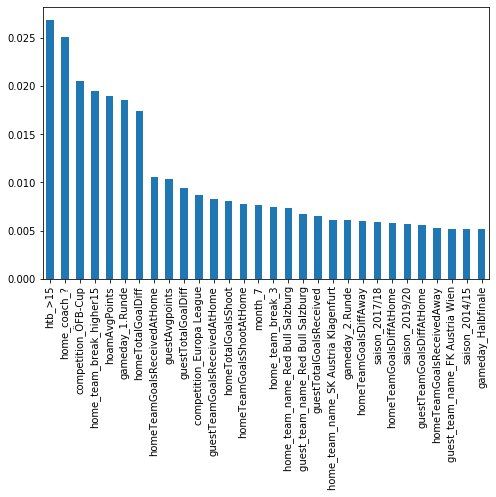

In [331]:
feat_imp = pd.Series(xgboost.feature_importances_, index=X_train.columns)
plt.figure(figsize=(8,5))
feat_imp.nlargest(30).plot(kind='bar')

In [245]:
def val(model):
    model.fit(X_train, y_train)
    model_name = 'test'
    model_name = pd.DataFrame()
    model_name['pred_test'] = model.predict(X_test)
    model_name['actual_test'] = y_test.values
    model_name['calc_test'] = model_name['pred_test'] * model_name['actual_test']
    score_test = model_name['calc_test'][model_name['calc_test'] > 0].count() / (len(model_name['calc_test']) - model_name['calc_test'][model_name['calc_test'] == 0].count())
    neg_score_test = model_name['calc_test'][model_name['calc_test'] < 0].count() / (len(model_name['calc_test']) - model_name['calc_test'][model_name['calc_test'] == 0].count())
    
    print(round(score_test,4), round(neg_score_test,4), (score_test+neg_score_test))
    print(model_name.head())
    
    model_name = 'train'
    model_name = pd.DataFrame()
    model_name['pred_train'] = model.predict(X_train)
    model_name['actual_train'] = y_train.values
    model_name['calc_train'] = model_name['pred_train'] * model_name['actual_train']
    score_train = model_name['calc_train'][model_name['calc_train'] > 0].count() / (len(model_name['calc_train']) - model_name['calc_train'][model_name['calc_train'] == 0].count())
    neg_score_train = model_name['calc_train'][model_name['calc_train'] < 0].count() / (len(model_name['calc_train']) - model_name['calc_train'][model_name['calc_train'] == 0].count())

    print('\n', round(score_train,4), round(neg_score_train,4), (score_train+neg_score_train))
    print(model_name.head())   

In [411]:
val(rfr)

0.6414 0.3586 1.0
   pred_test  actual_test  calc_test
0   0.102045          0.0   0.000000
1  -0.302932          1.0  -0.302932
2  -0.062125          5.0  -0.310625
3  -0.251809          0.0  -0.000000
4   0.174208         -1.0  -0.174208

 0.6837 0.3163 1.0
   pred_train  actual_train  calc_train
0    0.546919          -1.0   -0.546919
1   -0.433891           0.0   -0.000000
2    0.683314           0.0    0.000000
3   -0.483200           1.0   -0.483200
4   -0.054518           1.0   -0.054518


In [247]:
val(xgboost)

0.6731 0.3269 1.0
   pred_test  actual_test  calc_test
0   0.894339          1.0   0.894339
1  -0.071337          0.0  -0.000000
2   0.271314         -3.0  -0.813941
3   0.099478         -3.0  -0.298435
4   0.691256          0.0   0.000000

 0.695 0.305 1.0
   pred_train  actual_train  calc_train
0   -0.174078          -2.0    0.348155
1   -0.346250           2.0   -0.692499
2    0.352688          -1.0   -0.352688
3    0.505679           1.0    0.505679
4   -0.421043           0.0   -0.000000


In [248]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfr, random_state=123).fit(X_test, y_test)

In [249]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=None )

Weight,Feature
0.0441 ± 0.0123,hoamAvgPoints
0.0325 ± 0.0480,homeTeamGoalsReceivedAtHome
0.0262 ± 0.0056,competition_ÖFB-Cup
0.0219 ± 0.0250,homeTeamGoalsReceivedAway
0.0206 ± 0.0159,homeTeamGoalsShootAway
0.0170 ± 0.0406,guestTeamGoalsReceivedAtHome
0.0162 ± 0.0101,homeTotalGoalDiff
0.0159 ± 0.0150,guestTotalGoalDiff
0.0122 ± 0.0206,guestTotalGoalsShoot
0.0111 ± 0.0088,weekday_4


In [250]:
from sklearn.linear_model import SGDRegressor

In [251]:
sgdr = SGDRegressor()

In [252]:
sgdr.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [253]:
sgdr.score(X_train, y_train)

0.3195468472296463

In [254]:
sgdr.score(X_test, y_test)

0.13673577434689788

In [255]:
val(sgdr)

0.6646 0.3354 1.0
   pred_test  actual_test  calc_test
0   0.895990          1.0   0.895990
1   0.283339          0.0   0.000000
2   0.308216         -3.0  -0.924648
3   0.559772         -3.0  -1.679317
4   0.684609          0.0   0.000000

 0.706 0.294 1.0
   pred_train  actual_train  calc_train
0   -0.490536          -2.0    0.981073
1    0.079686           2.0    0.159373
2    0.238404          -1.0   -0.238404
3    1.042896           1.0    1.042896
4   -0.841056           0.0   -0.000000
